<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Modulo_03/Bootcamp_Mod3_Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg'>

# **Análise de séries temporais**

---

Esse notebook servirá para o acompanhamento das aulas do Módulo 03 do ***Bootcamp de Data Science Aplicada*** realizado pela Alura.

Neste módulo vamos descobrir o que são séries temporais e estudar suas particularidades.

Todo arcabouço teórico adquirido até aqui será aplicado para o entendimento das nuances envolvendo as séries temporais. Da estatística descritiva, passando pela análise exploratória e chegando às previsões, sempre de forma aplicada e prática utilizando ferramentas específicas para esse tipo de dados, como o **```StatisModel```** e **```Prophet```** desenvolvido pelo **Facebook**.

---

## **Aula 01 - Entendendo a Série Temporal**
---


### Aula 01 - Vídeo 01
Atividade 3 - Coleta de Dados e Primeiras Análises

In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

In [3]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (12,6)

In [4]:
url = 'https://github.com/gcochlar/Bootcamp_DataScience/blob/main/dados/dados_covid_sp-2021-06-17.zip?raw=true'

In [5]:
dados = pd.read_csv(url,
                    sep = ';',
                    compression = 'zip')

In [6]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [7]:
dados['datahora'] = pd.to_datetime(dados.datahora,
                                   format = '%Y-%m-%d')

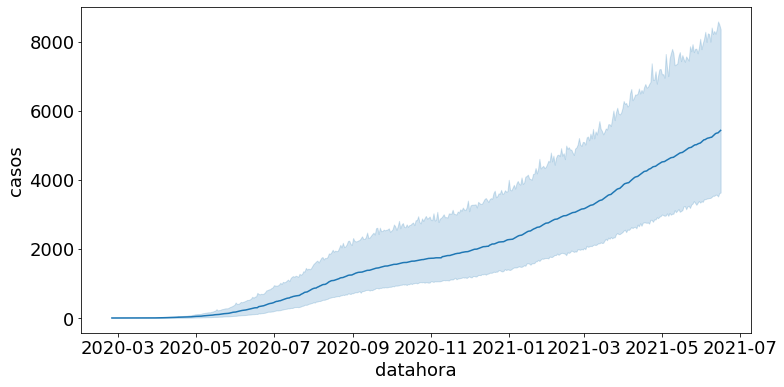

In [8]:
sns.lineplot(data = dados,
             x = 'datahora',
             y = 'casos') # intervalo de confiança (ci) default é 95%

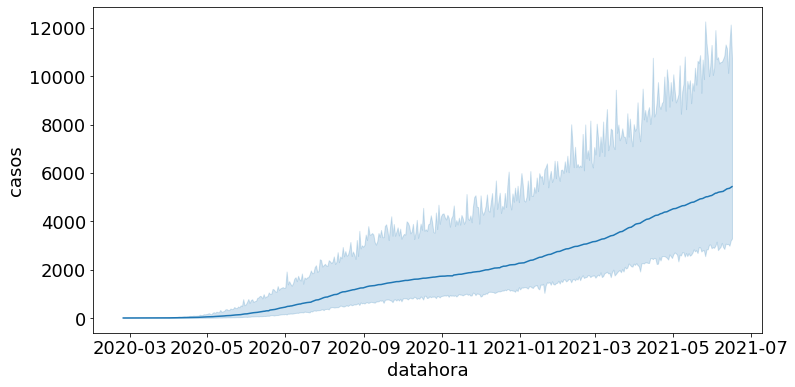

In [9]:
sns.lineplot(data = dados,
             x = 'datahora',
             y = 'casos',
             ci=100)

**HIPÓTESE:** O crescimento de casos no estado de SP é exponencial.

In [10]:
eixo_x = np.linspace(-2,2,100)
y_exp = np.exp(eixo_x)

A partir dos dados de **x** e **y** gerados acima, vamos plotar uma curva exponencial.

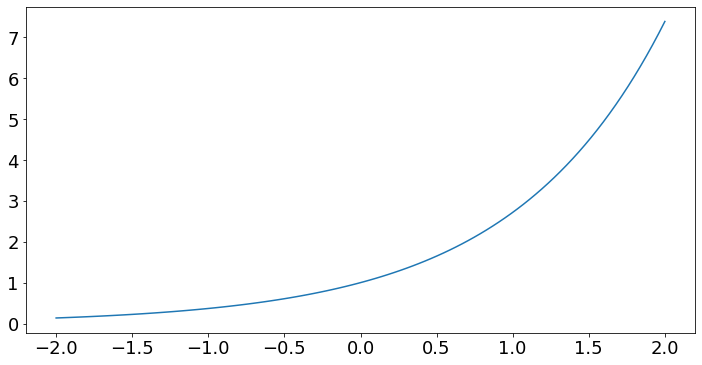

In [11]:
sns.lineplot(x = eixo_x,
             y = y_exp)

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$


Se aplicarmos o logaritmo na escala do eixo **y**, veremos que a curva exponencial, para os mesmos dados, se torna uma reta.

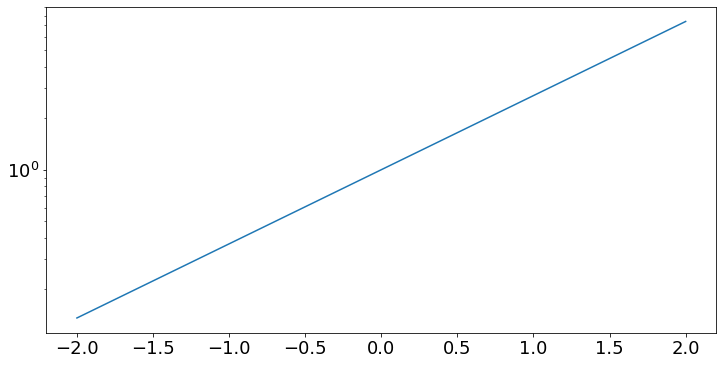

In [12]:
sns.lineplot(x = eixo_x,
             y = y_exp)
mpl.pyplot.yscale('log')

In [13]:
dados_spc = dados.query('nome_munic == "São Paulo"')
dados_spc.shape

(478, 26)

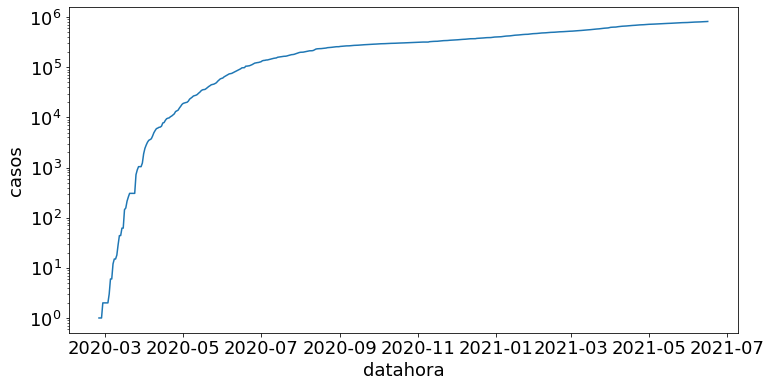

In [14]:
sns.lineplot(x = 'datahora',
             y = 'casos',
             data = dados_spc)
mpl.pyplot.yscale('log')

Apesar de não termos uma reta única, podemos ver pelo menos 3 segmentos de retas, com inclinações diferentes.

A **hipótese** se confirma, o crescimento foi exponencial, apesar de ter ocorrido em 3 momentos diferentes, mudando a taxa de crescimento em cada ponto que altera a inclinação da reta.


<img src='https://drive.google.com/uc?id=1YgdKDm4xdkUkNl40Wx3JyJcEoIaWj8Hv'>

#### **Desafio - Filtrar a base para pegar o município de São Paulo sem usar a função ```query```**
---

In [15]:
df_sp = dados[(dados['nome_munic'] == 'São Paulo')]
df_sp.shape

(478, 26)

In [16]:
df_sp2 = dados.loc[(dados['nome_munic'] == 'São Paulo')]
df_sp2.shape

(478, 26)

#### **Desafio - Escolher outro município (do estado de SP ou não) para fazer a análise**
---


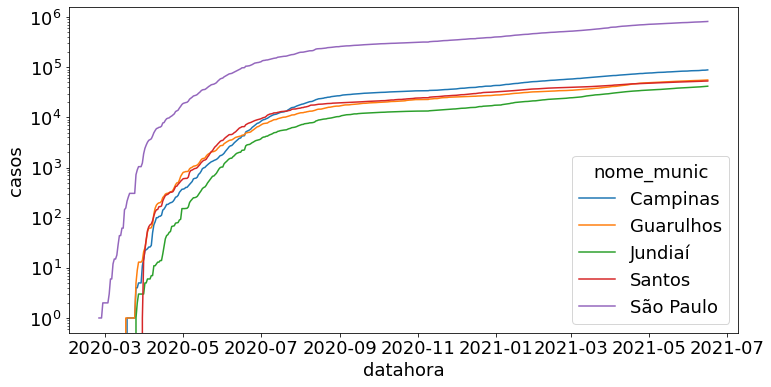

In [17]:
lista_cidades = ['São Paulo','Santos','Campinas','Jundiaí','Guarulhos']

dados_desafio = dados[(dados['nome_munic'].isin(lista_cidades))]
sns.lineplot(x = 'datahora',
             y = 'casos',
             hue='nome_munic',
             data = dados_desafio)
mpl.pyplot.yscale('log')

Para fazer a análise do desafio, criei uma variável contendo a lista de cidades a ser plotada e escolhi algumas das maiores cidades do estado para fazer uma comparação sem perder muito da visualização em função da escala.

Apesar de estarmos lidando com grandezas diferentes, principalmente ao compararmos a cidade de São Paulo com as demais, podemos verificar que a curva de crescimento com 3 estágios ou diferentes inclinações é muito semelhante em todas elas.

A fase inicial, mais aguda, com rápida disseminação, durando 45 a 60 dias. Depois tivemos medidas de restrição da circulação das pessoas, reduzindo a velocidade de contágio, com 90 a 120 dias. Por último, a fase de crescimento mais estável, que dura até hoje.

### Aula 01 - Vídeo 02
Atividade 4 - Taxa de Crescimento e Média Móvel

Até agora estávamos trabalhando com a variável 'casos', que nos apresentava os casos acumulados. Vamos passar a analisar agora os casos novos diários, através da coluna 'casos_novos'.

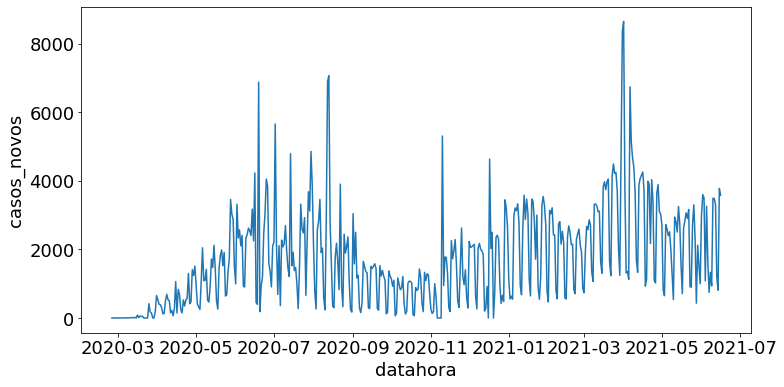

In [18]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_spc)

Esse gráfico é mais "nervoso", a série de dados apresentada é mais caótica, com variações muito abruptas no dia a dia.

Para suavizar essas variações e nos possibilitar uma melhor análise, devemos fazer a **diferenciação** dos dados.

Vamos demonstrar o processo com um *DataFrame* de exemplo.

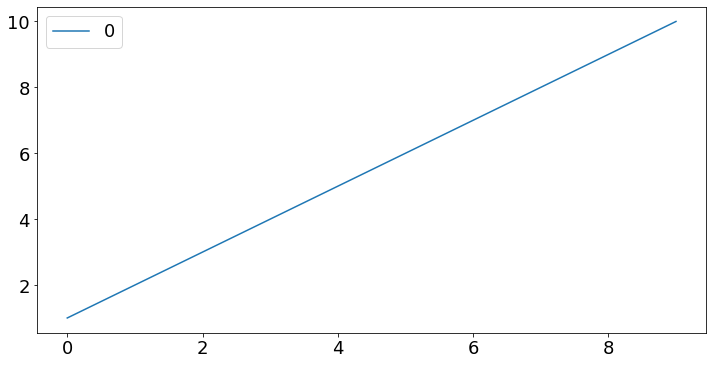

In [19]:
dados_exemplo = pd.DataFrame(
    data = np.linspace(1,10,10))

sns.lineplot(data = dados_exemplo)

In [20]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

dados_exemplo

,0,diferenciado
0,1.0,NaN
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0
5,6.0,1.0
6,7.0,1.0
7,8.0,1.0
8,9.0,1.0
9,10.0,1.0


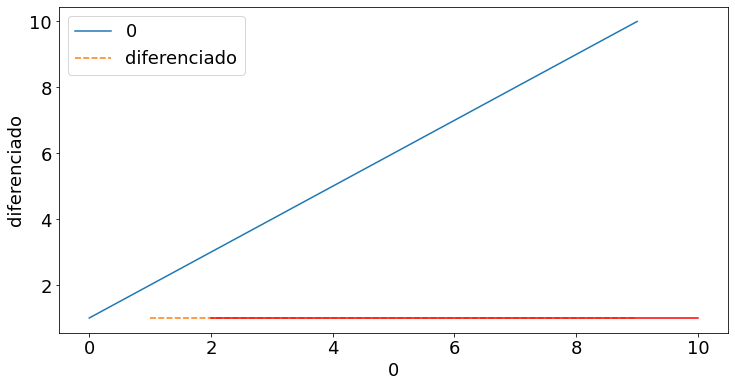

In [21]:
sns.lineplot(data = dados_exemplo)
sns.lineplot(data = dados_exemplo, x = 0, y = 'diferenciado', color = 'red')

Podemos observar que a linha vermelha, com os dados diferenciados, se torna uma reta horizontal. A **diferenciação** nada mais é do que a substituição do valor absoluto pela diferença entre o próprio e o seu valor anterior.

Como a nossa reta (em azul) foi montada com os valores de 1 a 10 variando de 1 em 1, o valor da diferenciação (a partir do segundo ponto do gráfico) é sempre 1.

In [22]:
dados_spc['taxa_crescimento_casos'] = dados_spc['casos_novos'].diff()
dados_spc['taxa_crescimento_obitos'] = dados_spc['obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


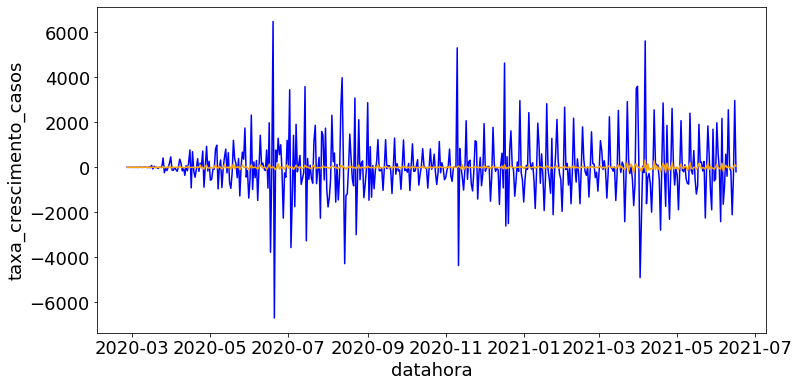

In [23]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_casos',
             data = dados_spc,
             color = 'blue')

sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_spc,
             color = 'orange')

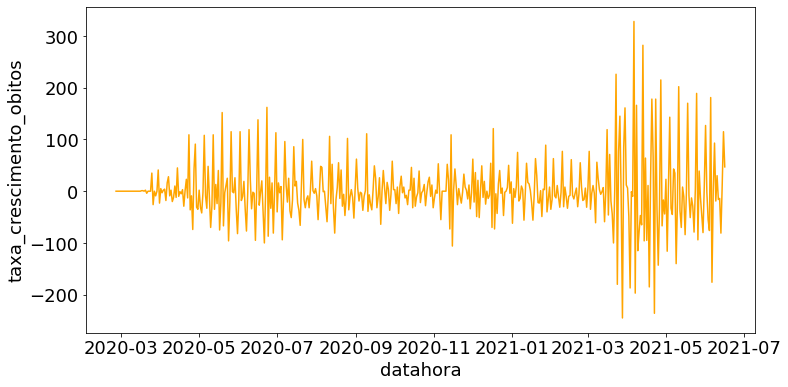

In [24]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_spc,
             color = 'orange')

#### **Desafio - Deixar o Notebook sem os** ***warnings***
---

Estou deixando os códigos comentados, por enquanto, para não ficar sem os *warnings*, mas a solução está abaixo.

In [25]:
#import warnings
#warnings.filterwarnings('ignore')

#### **Desafio - Verificar se o Pico da Taxa de Casos Novos Coincide com a Taxa de Óbitos Novos**
---


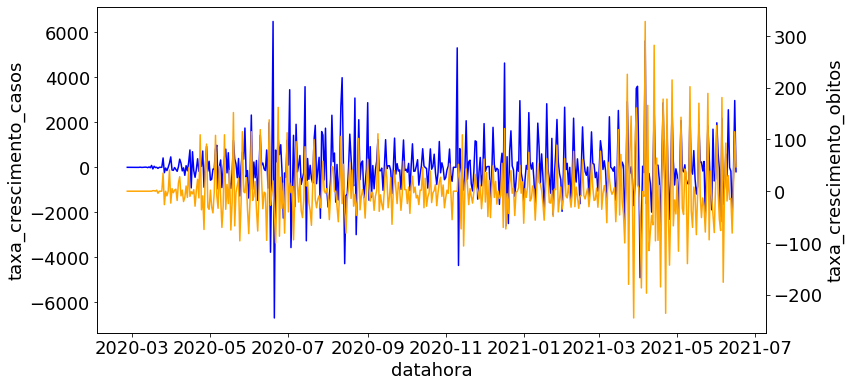

In [26]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_casos',
             data = dados_spc,
             color = 'blue')

plt.twinx()

sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_spc,
             color = 'orange')

Optei por trabalhar com um eixo **y** secundário para ficar mais fácil de visualizar as variações, já que usando um eixo único a escala praticamente impossibilita a visualização dos óbitos.

O pico de casos ocorrido do final de junho/2020 não parece ter tido um impacto muito grande na taxa de óbitos, bem como no pico do final de 2020.

Já o pico de abril a maio de 2021 parece ter tido mais impacto, deixando a taxa de óbitos com maior variação.

#### De volta para a aula...
---

Vamos colocar em um gráfico de barras para visualizar.

<BarContainer object of 478 artists>

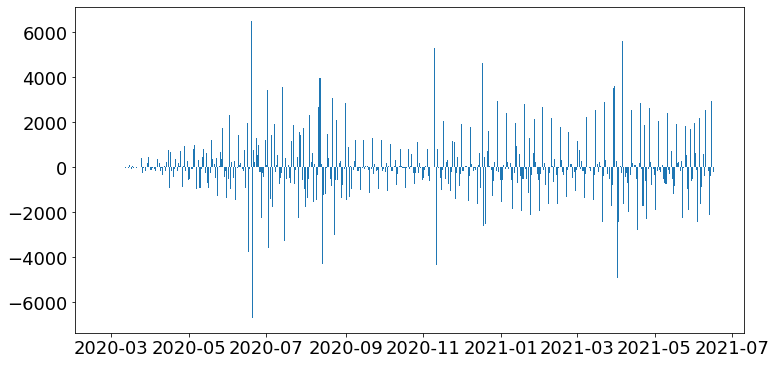

In [27]:
plt.bar(dados_spc['datahora'],dados_spc['taxa_crescimento_casos'])


In [28]:
dados_spc['Ano'] = pd.DatetimeIndex(dados_spc['datahora']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
dados_spc_2021 = dados_spc.query('Ano == 2021')

<BarContainer object of 167 artists>

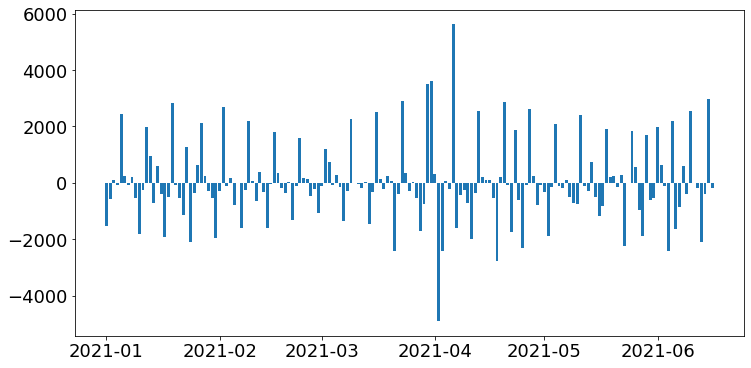

In [30]:
plt.bar(dados_spc_2021['datahora'],dados_spc_2021['taxa_crescimento_casos'])

<BarContainer object of 167 artists>

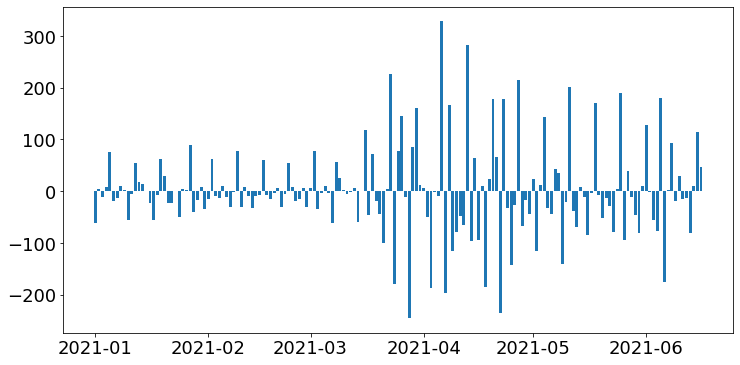

In [31]:
plt.bar(dados_spc_2021['datahora'],dados_spc_2021['taxa_crescimento_obitos'])

#### **Desafio - Deixar os gráficos mais bonitos**
---

Ajustar inclinação das *labels* do eixo **x**, colocar títulos, nomes dos eixos.

#### De volta para a aula...
---

Esses gráficos fazem parte do processo de análise mas normalmente não são mostrados para pessoas leigas.

Para mostrar o que está acontecendo, normalmente queremos passar uma ideia de tendências.

Vamos trabalhar com médias móveis, usando as informações dos casos novos somente para a cidade de São Paulo.

In [33]:
dados_spc['Média Móvel Casos Novos'] = dados_spc['casos_novos'].rolling(window = 7, ## trata a janela de observação como sendo de 7 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
dados_spc['Média Móvel Óbitos Novos'] = dados_spc['obitos_novos'].rolling(window = 7, ## trata a janela de observação como sendo de 7 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


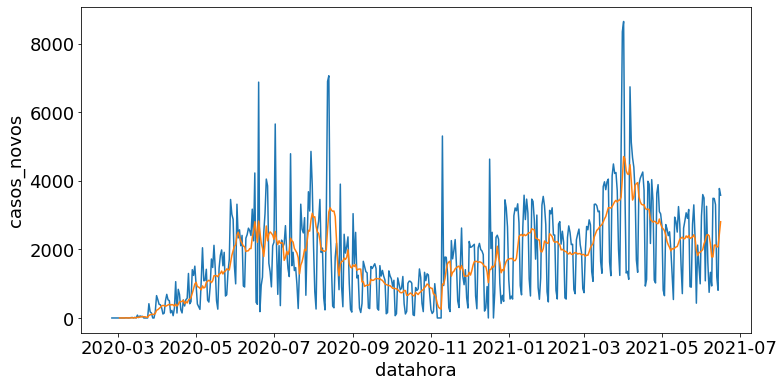

In [34]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_spc)
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Casos Novos',
             data = dados_spc)

#### **Desafio - Gerar o Gráfico da Média Móvel de Óbitos e Mudar o Gráfico de Casos para Barras**
---

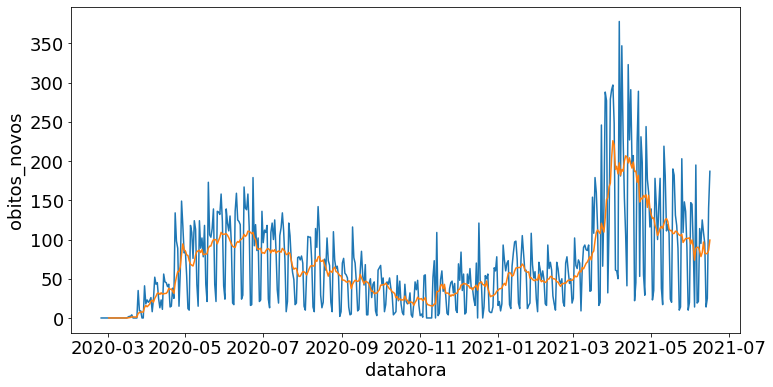

In [35]:
sns.lineplot(x = 'datahora',
             y = 'obitos_novos',
             data = dados_spc)
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Óbitos Novos',
             data = dados_spc)

#### **Desafio Extra - Gerar Gráficos de Casos Novos e Óbitos com a Média Móvel de 14 Períodos**
---

Resolvi gerar essas visualizações adicionais a título de curiosidade, para ver o quanto mais ficariam suavizadas as curvas dobrando a janela de média móvel para 14 dias.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


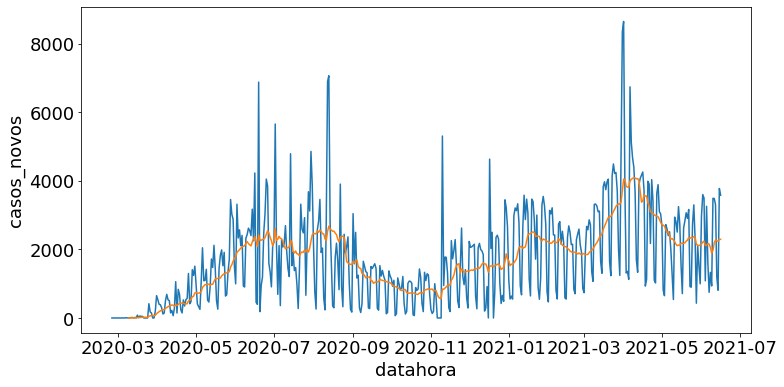

In [38]:
dados_spc['MM14 Casos Novos'] = dados_spc['casos_novos'].rolling(window = 14, ## trata a janela de observação como sendo de 7 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_spc)
sns.lineplot(x = 'datahora',
             y = 'MM14 Casos Novos',
             data = dados_spc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


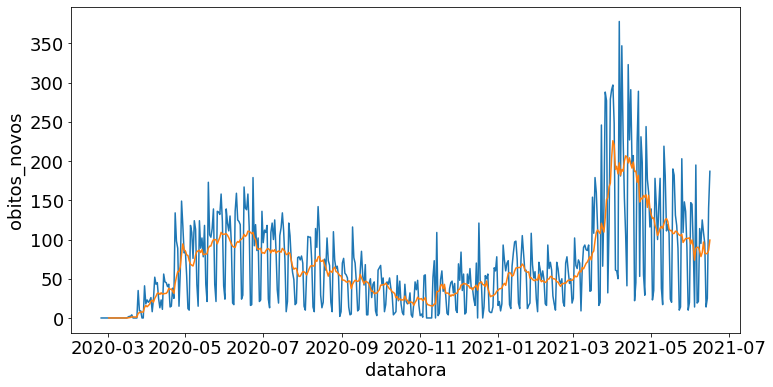

In [39]:
dados_spc['MM14 Óbitos Novos'] = dados_spc['obitos_novos'].rolling(window = 7, ## trata a janela de observação como sendo de 7 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
sns.lineplot(x = 'datahora',
             y = 'obitos_novos',
             data = dados_spc)
sns.lineplot(x = 'datahora',
             y = 'MM14 Óbitos Novos',
             data = dados_spc)

### Aula 01 - Vídeo 03
Atividade 5 - Correlação e Função de Autocorrelação

Para identificar sazonalidades, precisamos identificar a correlação entre períodos diferentes da nossa série temporal.

Vamos começar plotando a correlação mais óbvia, que seria da série com ela mesma.

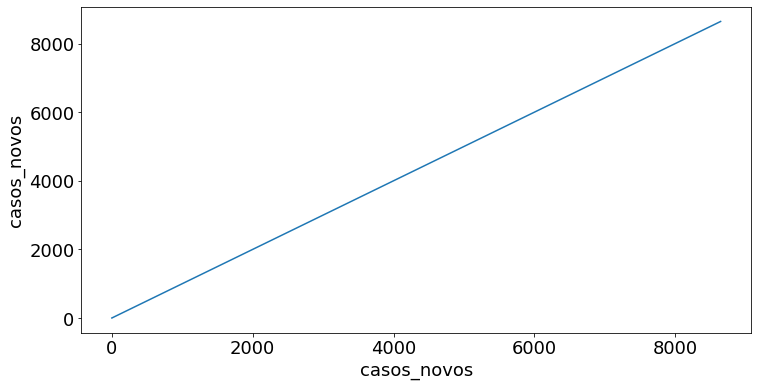

In [40]:
sns.lineplot(x = 'casos_novos',
             y = 'casos_novos',
             data = dados_spc)

Temos uma linha reta, na diagonal do gráfico, pois essa correlação dos dados com eles mesmos é forte, positiva e direta, ou seja, é igual a 1.

Vamos verificar se o número de casos novos é correlacionado ao número de óbitos.

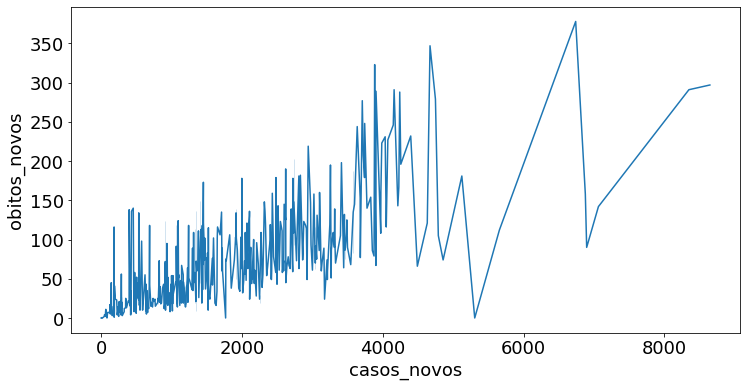

In [41]:
sns.lineplot(x = 'casos_novos',
             y = 'obitos_novos',
             data = dados_spc)

#### **Desafio - Mover o Número de Óbitos e Verificar se Altera a Correlação**
---

Deslocando os dados de óbitos 14 dias para frente e 14 dias para trás em relação aos dados de casos novos, verificar se isso altera a correlação, deixando o gráfico mais parecendo uma reta.

Eu acho que para trás não faz sentido, vale mais a pena testar mais janelas de dias para frente.

#### De volta para a aula...
---

Em busca de identificar sazonalidades, vamos separar os dados dos meses iniciais do ano de 2021.

In [43]:
dados_spc['Mês'] = pd.DatetimeIndex(dados_spc['datahora']).month
dados_spc_202101 = dados_spc.query('Mês == 1 & Ano == 2021')
dados_spc_202102 = dados_spc.query('Mês == 2 & Ano == 2021')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


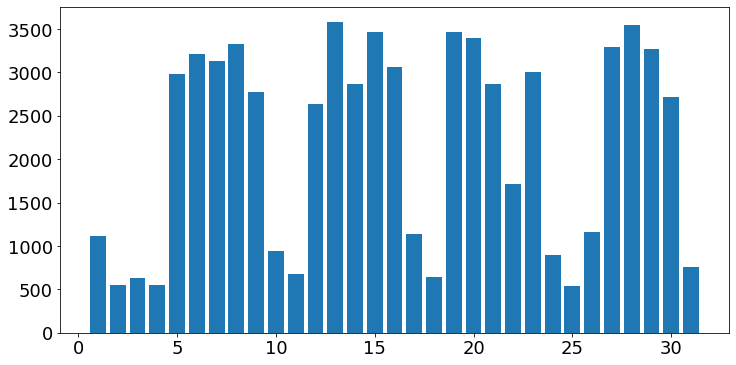

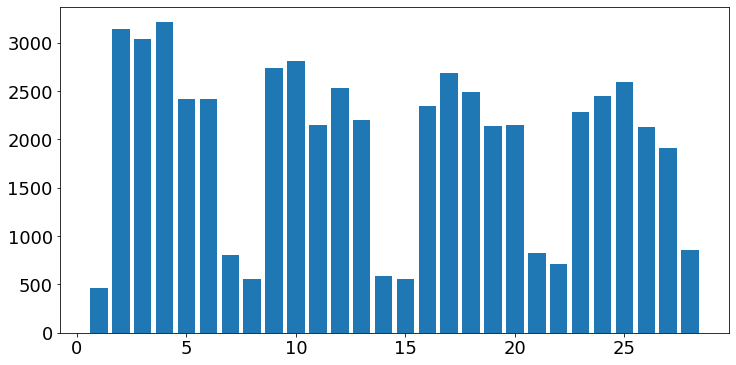

In [44]:
plt.bar(np.linspace(1,31,31),dados_spc_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28),dados_spc_202102['casos_novos'])
plt.show()

Podemos perceber um "padrão" de comportamento se repetindo semanalmente, tendo 5 dias com elevado número de casos novos e 2 dias de baixa notificação. Isso é uma sazonalidade.

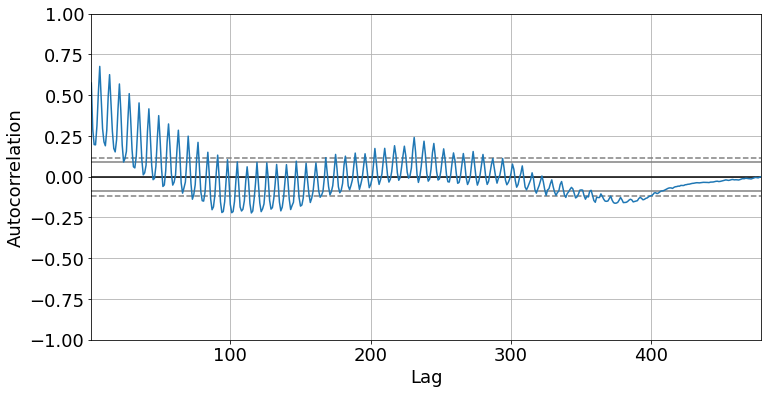

In [46]:
autocorrelation_plot(dados_spc['casos_novos'])

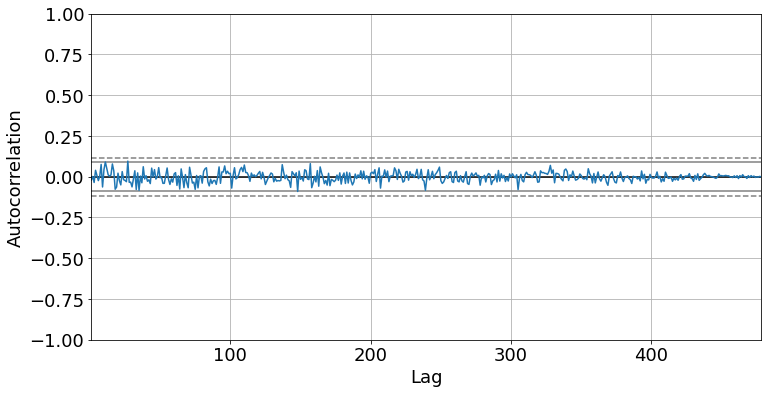

In [54]:
autocorrelation_plot(np.random.rand(dados_spc.shape[0]))

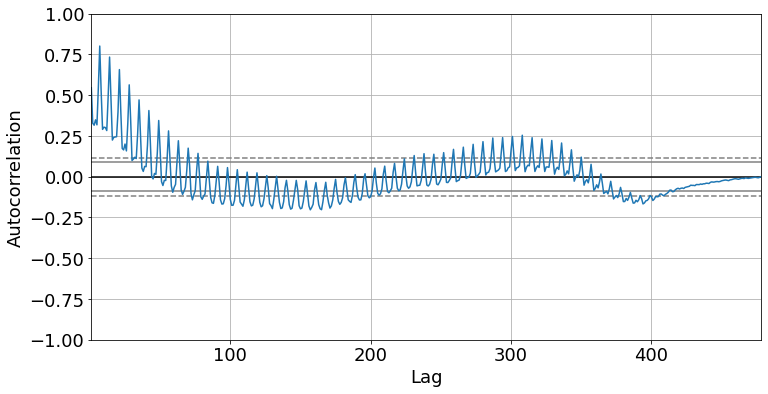

In [55]:
autocorrelation_plot(dados_spc['obitos_novos'])

#### **Desafio - Calcular a Correlação Cruzada dos Óbitos e Casos Novos**
---
Biblioteca Stats Models?

#### **Desafio - Escolher Outro Município e Refazer as Análises**
---


### **O que aprendemos nessa aula?**
---

>* Aprendemos o que é uma série temporal;
* Calculamos a taxa de crescimento de um evento em uma série temporal;
* Aprendemos o que é uma média móvel;
* Entendemos o que é correlação e função de autocorrelação.

---
* Preciso entender melhor a questão do funcionamento do **```autocorrelation_plot```**, principalmente o real significado dos *lags*.

Eu entendi que são os diferentes deslocamentos da série de dados que são feitos para verificar a correlação, mas é melhor confirmar. Achei o resultado muito rápido para ser isso, que é bem mais complexo.